# 用dropout進一步改進簡單網路

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671)

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 定義網路和訓練 -- 加入Dropout

In [2]:
from keras.layers import Dropout

NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10  #輸出個數等於數字的個數
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2  #訓練中用於驗證集的資料比例
DROPOUT = 0.3  #定義每次訓練要放棄的資料比例

# 資料：混合並劃分訓練集和測試集資料

(X_train, y_train), (X_test, y_test) = mnist.load_data()

RESHAPED = 28 * 28

X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

# 正則化
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

#編譯模型
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

#開始訓練
history = model.fit(X_train, y_train, \
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH, \
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)

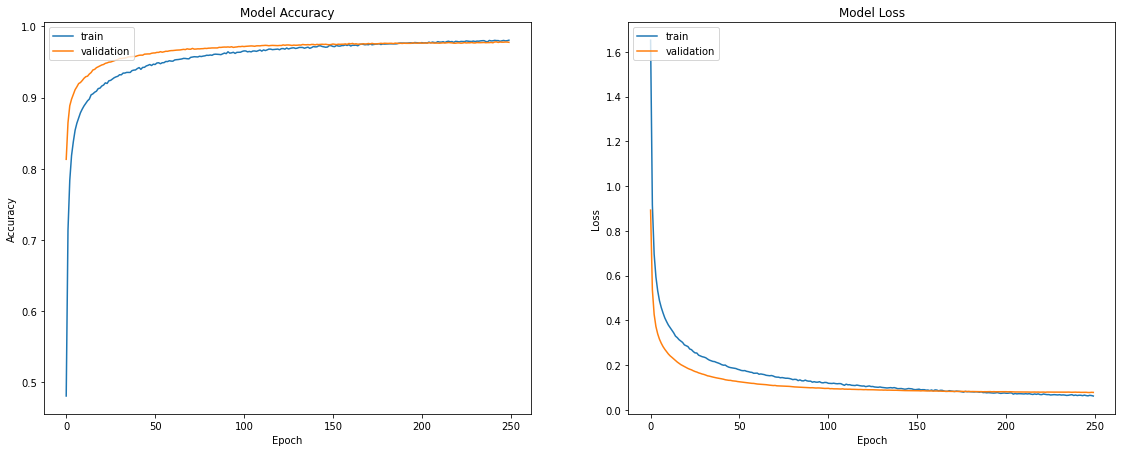

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19.2, 7.2))
(ax1, ax2) = fig.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()